In [1]:
import numpy
import matplotlib.pyplot as plt
from BayesicFitting import *
#from BayesicFitting import Plotter
import matplotlib.gridspec as gridspec



In [2]:
x = numpy.linspace( -10.0, 10.0, 2001 )

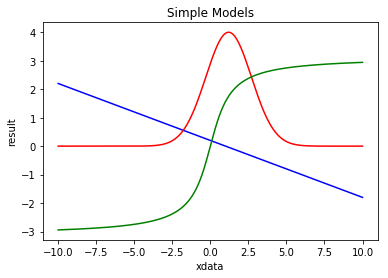

In [3]:
m1 = PolynomialModel( 1 )
m2 = GaussModel()
m3 = ArctanModel()
p1 = [0.2, -0.2]
p2 = [4.0, 1.2, 1.5]
p3 = [2.0, 0.0, 1.0]

plt.plot( x, m1.result( x, p1 ), 'b-' )
plt.plot( x, m2.result( x, p2 ), 'r-' )
plt.plot( x, m3.result( x, p3 ), 'g-' )

plt.title( "Simple Models" )
plt.xlabel( "xdata" )
plt.ylabel( "result" )
#plt.show()
plt.savefig( "manual-1.png", format="png" )

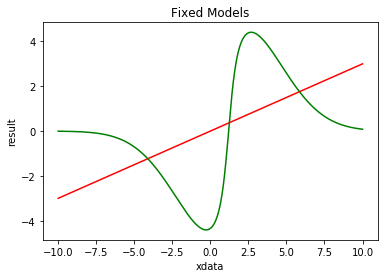

In [4]:
m4 = PolynomialModel( 1, fixed={0:0.0} )
m5 = ArctanModel( fixed={0:m2} )

# m4 has only one parameter left.
p4 = [0.3]
# m5 has 5 parameters: 2 from ArctanModel and 3 from GaussModel
p5 = [1.2, 2, 4.0, 1.2, 3.0]

plt.plot( x, m4.result( x, p4 ), 'r-' )
plt.plot( x, m5.result( x, p5 ), 'g-' )
plt.title( "Fixed Models")
plt.xlabel( "xdata" )
plt.ylabel( "result" )

#plt.show()
plt.savefig( "manual-2.png", format="png" )

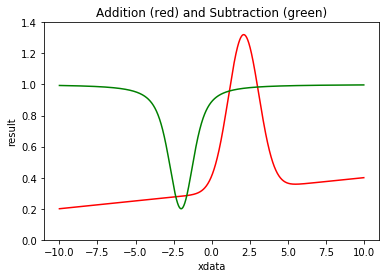

In [5]:
m6 = m1 + m2
p6 = [0.3, 0.01, 1.0, 2.1, 1.0]
plt.plot( x, m6.result( x, p6 ), 'r-' )

m7 = PolynomialModel( 0 ) - VoigtModel()
p7 = [1.0, 0.8, -2.0, 0.5, 0.6]
plt.plot( x, m7.result( x, p7 ), 'g-' )

plt.title( "Addition (red) and Subtraction (green)")
plt.xlabel( "xdata" )
plt.ylabel( "result" )
plt.ylim( 0, 1.4 )
#plt.show()
plt.savefig( "manual-3.png", format="png" )

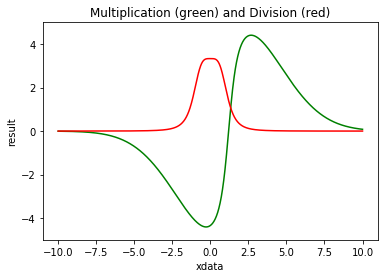

In [30]:
x = numpy.linspace( -10, 10, 1001 )
m8 = ArctanModel( fixed={0:1.0} ) * GaussModel()
p8 = [1.2, 2, 4.0, 1.2, 3.0]
plt.plot( x, m8.result( x, p8 ), 'g-' )

m9 = PowerModel( 0 ) + PowerModel( 4.0 )
m9 = ConstantModel( values=0.1 ) / m9
m9 = ConstantModel( values=0.1 ) / ( PowerModel(0) + PowerModel(4) )
p9 = [0.03, 0.02]
plt.plot( x, m9.result( x, p9 ), 'r-' )

plt.title( "Multiplication (green) and Division (red)")
plt.xlabel( "xdata" )
plt.ylabel( "result" )
plt.ylim( -5, 5 )
#plt.show()
plt.savefig( "manual-4.png", format="png" )

Polynomial: f( x:p ) = p_0 + (1.0) * x |
{ Arctan: f( x:p ) = (1.0) * arctan( p_1 * ( x - (0.0) ) ) *
  Gauss: f( x:p ) = p_2 * exp( -0.5 * ( ( x - (0.0) ) / p_3 )^2 ) }


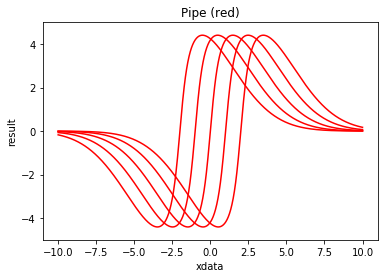

In [31]:
m10 = ArctanModel( fixed={0:1.0,1:0.0} ) * GaussModel( fixed={1:0.0} )
m11 = PolynomialModel( 1, fixed={1:1.0} ) | m10
print( m11 )
p11 = [-2., 2, 4.0, 3.0]

for k in range( 5 ):
    plt.plot( x, m11.result( x, p11 ), 'r-' )
    p11[0] += 1
#plt.plot( x, m8.result( x, p8 ), 'g-' )

plt.title( "Pipe (red)")
plt.xlabel( "xdata" )
plt.ylabel( "result" )
plt.ylim( -5, 5 )
#plt.show()
plt.savefig( "manual-5.png", format="png" )

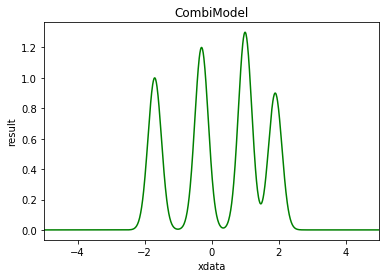

In [8]:
gm = GaussModel()
m12 = CombiModel( gm, 4, addCombi={1:[0,1.4,2.7,3.6]}, mulCombi={2:[1,1,1,1]} )
p12 = [1.0, -1.7, 0.2, 1.2, 1.3, 0.9 ]
p12 = numpy.asarray( p12 )
#printclass( m12 )
#print( gm )
#print( m12.result( x, p12 ) )
plt.plot( x, m12.result( x, p12 ), 'g-' )

plt.title( "CombiModel")
plt.xlabel( "xdata" )
plt.ylabel( "result" )
plt.xlim( -5.0, 5.0 )
#plt.show()
plt.savefig( "manual-c.png", format="png" )

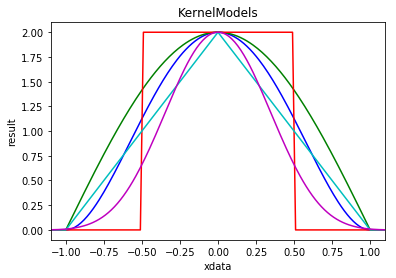

In [9]:
km1 = KernelModel()
km2 = KernelModel( kernel=Cosine() )
km3 = KernelModel( kernel=Tophat( 0 ) )
km4 = KernelModel( kernel=Tophat( 1 ) )
km5 = KernelModel( kernel=Tophat( 4 ) )
pk = [2.0, 0.0, 1.0]
plt.plot( x, km1.result( x, pk ), 'b-')
plt.plot( x, km2.result( x, pk ), 'g-')
plt.plot( x, km3.result( x, pk ), 'r-')
plt.plot( x, km4.result( x, pk ), 'c-')
pk[2] /= 2.0
plt.plot( x, km5.result( x, pk ), 'm-')

plt.title( "KernelModels")
plt.xlabel( "xdata" )
plt.ylabel( "result" )
plt.xlim( -1.1, 1.1 )
#plt.show()
plt.savefig( "manual-k.png", format="png" )


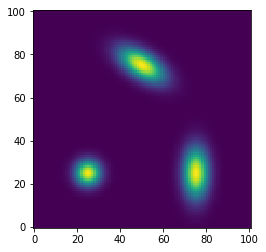

In [10]:
km6 = Kernel2dModel( kernel=Gauss() )
km7 = Kernel2dModel( kernel=Gauss(), shape='elliptic' )
km8 = Kernel2dModel( kernel=Gauss(), shape='Rotated' )
N = 101
yy = numpy.zeros( (N, N), dtype=float )
#print( yy.shape )
ias = ImageAssistant()
xx = ias.getIndices( yy )
#print( xx.shape )
par6 = [10.0, 25.0, 25.0, 4.0]
par7 = [10.0, 25.0, 75.0, 8.0, 4.0]
par8 = [10.0, 75.0, 50.0, 8.0, 4.0, 1.0]

rr = km6.result( xx, par6 )
#print( rr.shape )
yy += ias.resizeData( rr, shape=yy.shape )
yy += ias.resizeData( km7.result( xx, par7 ), shape=yy.shape )
yy += ias.resizeData( km8.result( xx, par8 ), shape=yy.shape )

plt.imshow( yy, origin="lower" )
#plt.show()
plt.savefig( "manual-k2.png", format="png" )

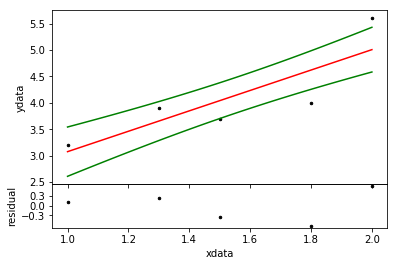

In [11]:
xdata = numpy.asarray( [1.0, 1.3, 1.5, 1.8, 2.0] )
ydata = numpy.asarray( [3.2, 3.9, 3.7, 4.0, 5.6] )
model = PolynomialModel( 1 )        # suppose liner relation
ftr = Fitter( xdata, model )        # define the fitter
par = ftr.fit( ydata )   # optimal values for parameters
#plt.figure( "Fitter Results" )
plotFit( xdata, data=ydata, model=model, residuals=True, fitter=ftr, show=False )
plt.savefig( "manual-6.png", format="png" )

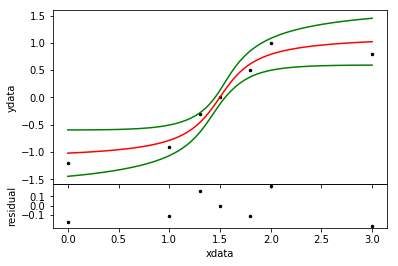

In [12]:
xdata = numpy.asarray( [ 0.0, 1.0, 1.3, 1.5, 1.8, 2.0, 3.0] )
ydata = numpy.asarray( [-1.2,-0.9,-0.3, 0.0, 0.5, 1.0, 0.8] )
wgts  = numpy.asarray( [ 0.5, 2.1, 0.9, 1.3, 1.2, 0.8, 1.1] )  # weights
model = ArctanModel( )
ftr = LevenbergMarquardtFitter( xdata, model )  # define the fitter 
par = ftr.fit( ydata, weights=wgts )            # optimal parameters
plotFit( xdata, data=ydata, model=model, residuals=True, fitter=ftr, show=False )
plt.savefig( "manual-7.png", format="png" )

In [13]:
np = 101
xdata = numpy.linspace( 0, 1, np )
ydata = numpy.linspace( 0.3, 0.5, np ) + 0.3 * numpy.random.rand( np )
no = 20 
out = numpy.asarray( np * numpy.random.rand( no ), dtype=int )
val = 1 * numpy.random.rand( no )
ydata[out] += val
pm = PolynomialModel( 1 )
ftr = Fitter( xdata, pm )
par0 = ftr.fit( ydata )
rft = RobustShell( ftr )
par1 = rft.fit( ydata )
rwgt = rft.weights



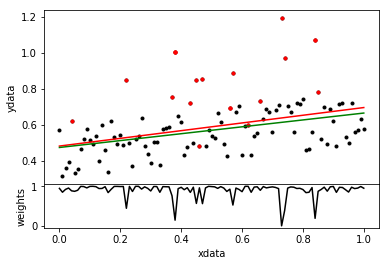

In [14]:
plt.figure( 1 )
plt.subplots_adjust( hspace=0.001 )

gs = gridspec.GridSpec( 2, 1, height_ratios=[4, 1])
        
ax0 = plt.subplot( gs[0] )
ax0.plot( xdata, ydata, 'k.' )
ax0.plot( xdata[out], ydata[out], 'r.' )
ax0.plot( xdata, pm.result( xdata, par0 ), 'r-' )
ax0.plot( xdata, pm.result( xdata, par1 ), 'g-' )
y0axis = ax0.get_yaxis()
plt.ylabel( "ydata" )
xticklabels = ax0.get_xticklabels()
plt.setp( xticklabels, visible=False )

ax1 = plt.subplot( gs[1] )
ax1.plot( xdata, rwgt, 'k-' )

plt.xlabel( "xdata" )
plt.ylabel( "weights" )
plt.savefig( "manual-8.png", format="png" )




1 2


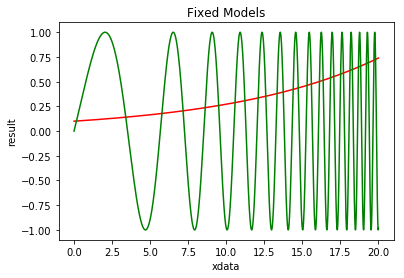

In [14]:
x = numpy.linspace( 0, 20, 2001 )
m4 = ExpModel( fixed={1:0.1})
m5 = SineModel( fixed={0:m4, 1:0} )

#m4 = PolynomialModel( 1, fixed={0:1.0} )
print( m4.npars, m5.npars )
p4 = [0.1]
#p5 = [0.0,1.0,0.1,0.1]
p5 = [1.0, 0.1]

plt.plot( x, m4.result( x, p4 ), 'r-' )
plt.plot( x, m5.result( x, p5 ), 'g-' )
plt.title( "Fixed Models")
plt.xlabel( "xdata" )
plt.ylabel( "result" )

#plt.show()
plt.savefig( "manual-2f.png", format="png" )